<a href="https://colab.research.google.com/github/mirchandani-mohnish/ClusterMetrics/blob/main/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
iris = pd.read_csv(os.path.join(path, "iris.csv"))
iris = iris.dropna()

100%|██████████| 0.98k/0.98k [00:00<00:00, 1.95MB/s]

Extracting files...


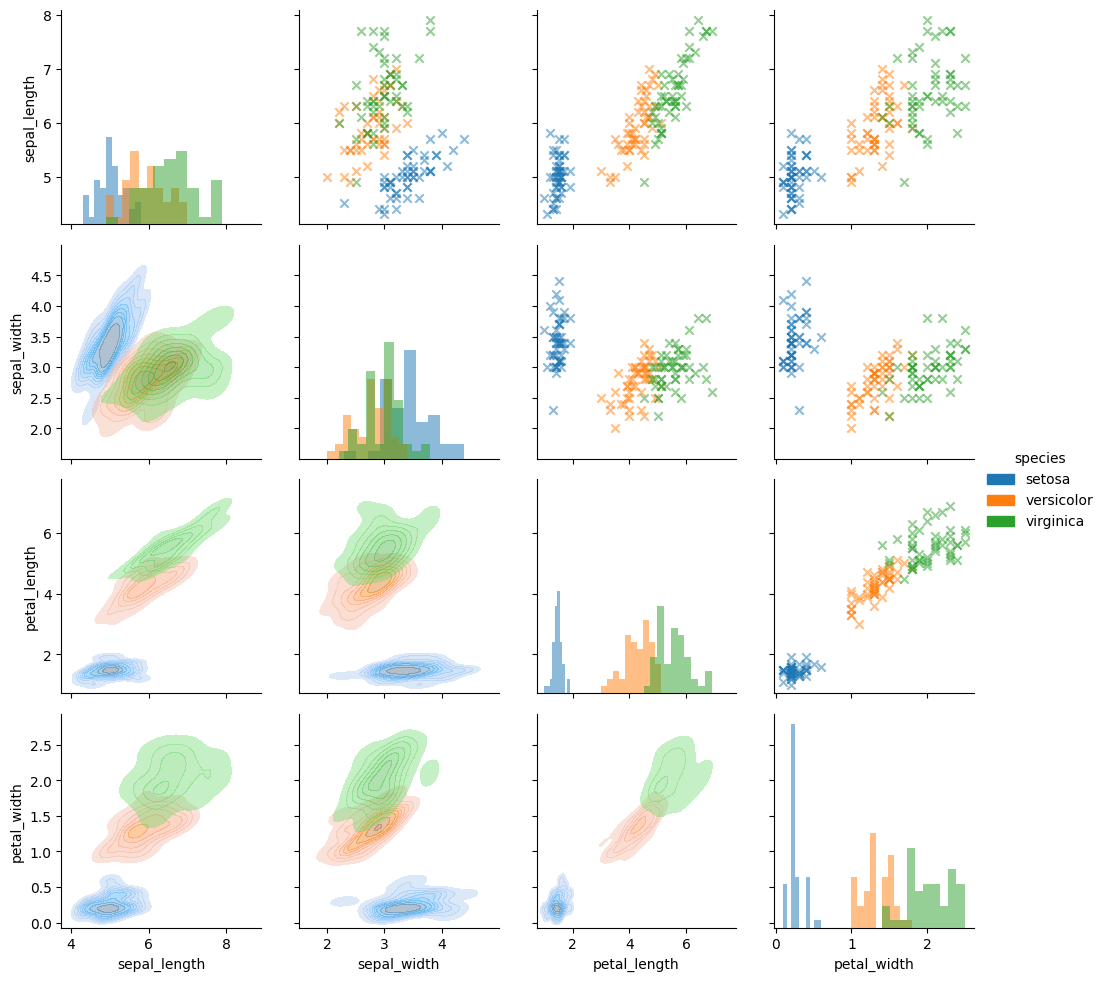

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.4)
g.add_legend()

In [ ]:
path = kagglehub.dataset_download("katerynameleshenko/ai-index")
ai = pd.read_csv(os.path.join(path, "AI_index_db.csv"))
ai = ai.dropna()

ai["Total_score_Category"] = pd.cut(
    ai["Total score"],
    bins=[-float("inf"), 17.03, 26.91, float("inf")],
    labels=["Low", "Medium", "High"]
)
ai = ai.drop(columns=["Total score"])

100%|██████████| 2.38k/2.38k [00:00<00:00, 3.72MB/s]

Extracting files...


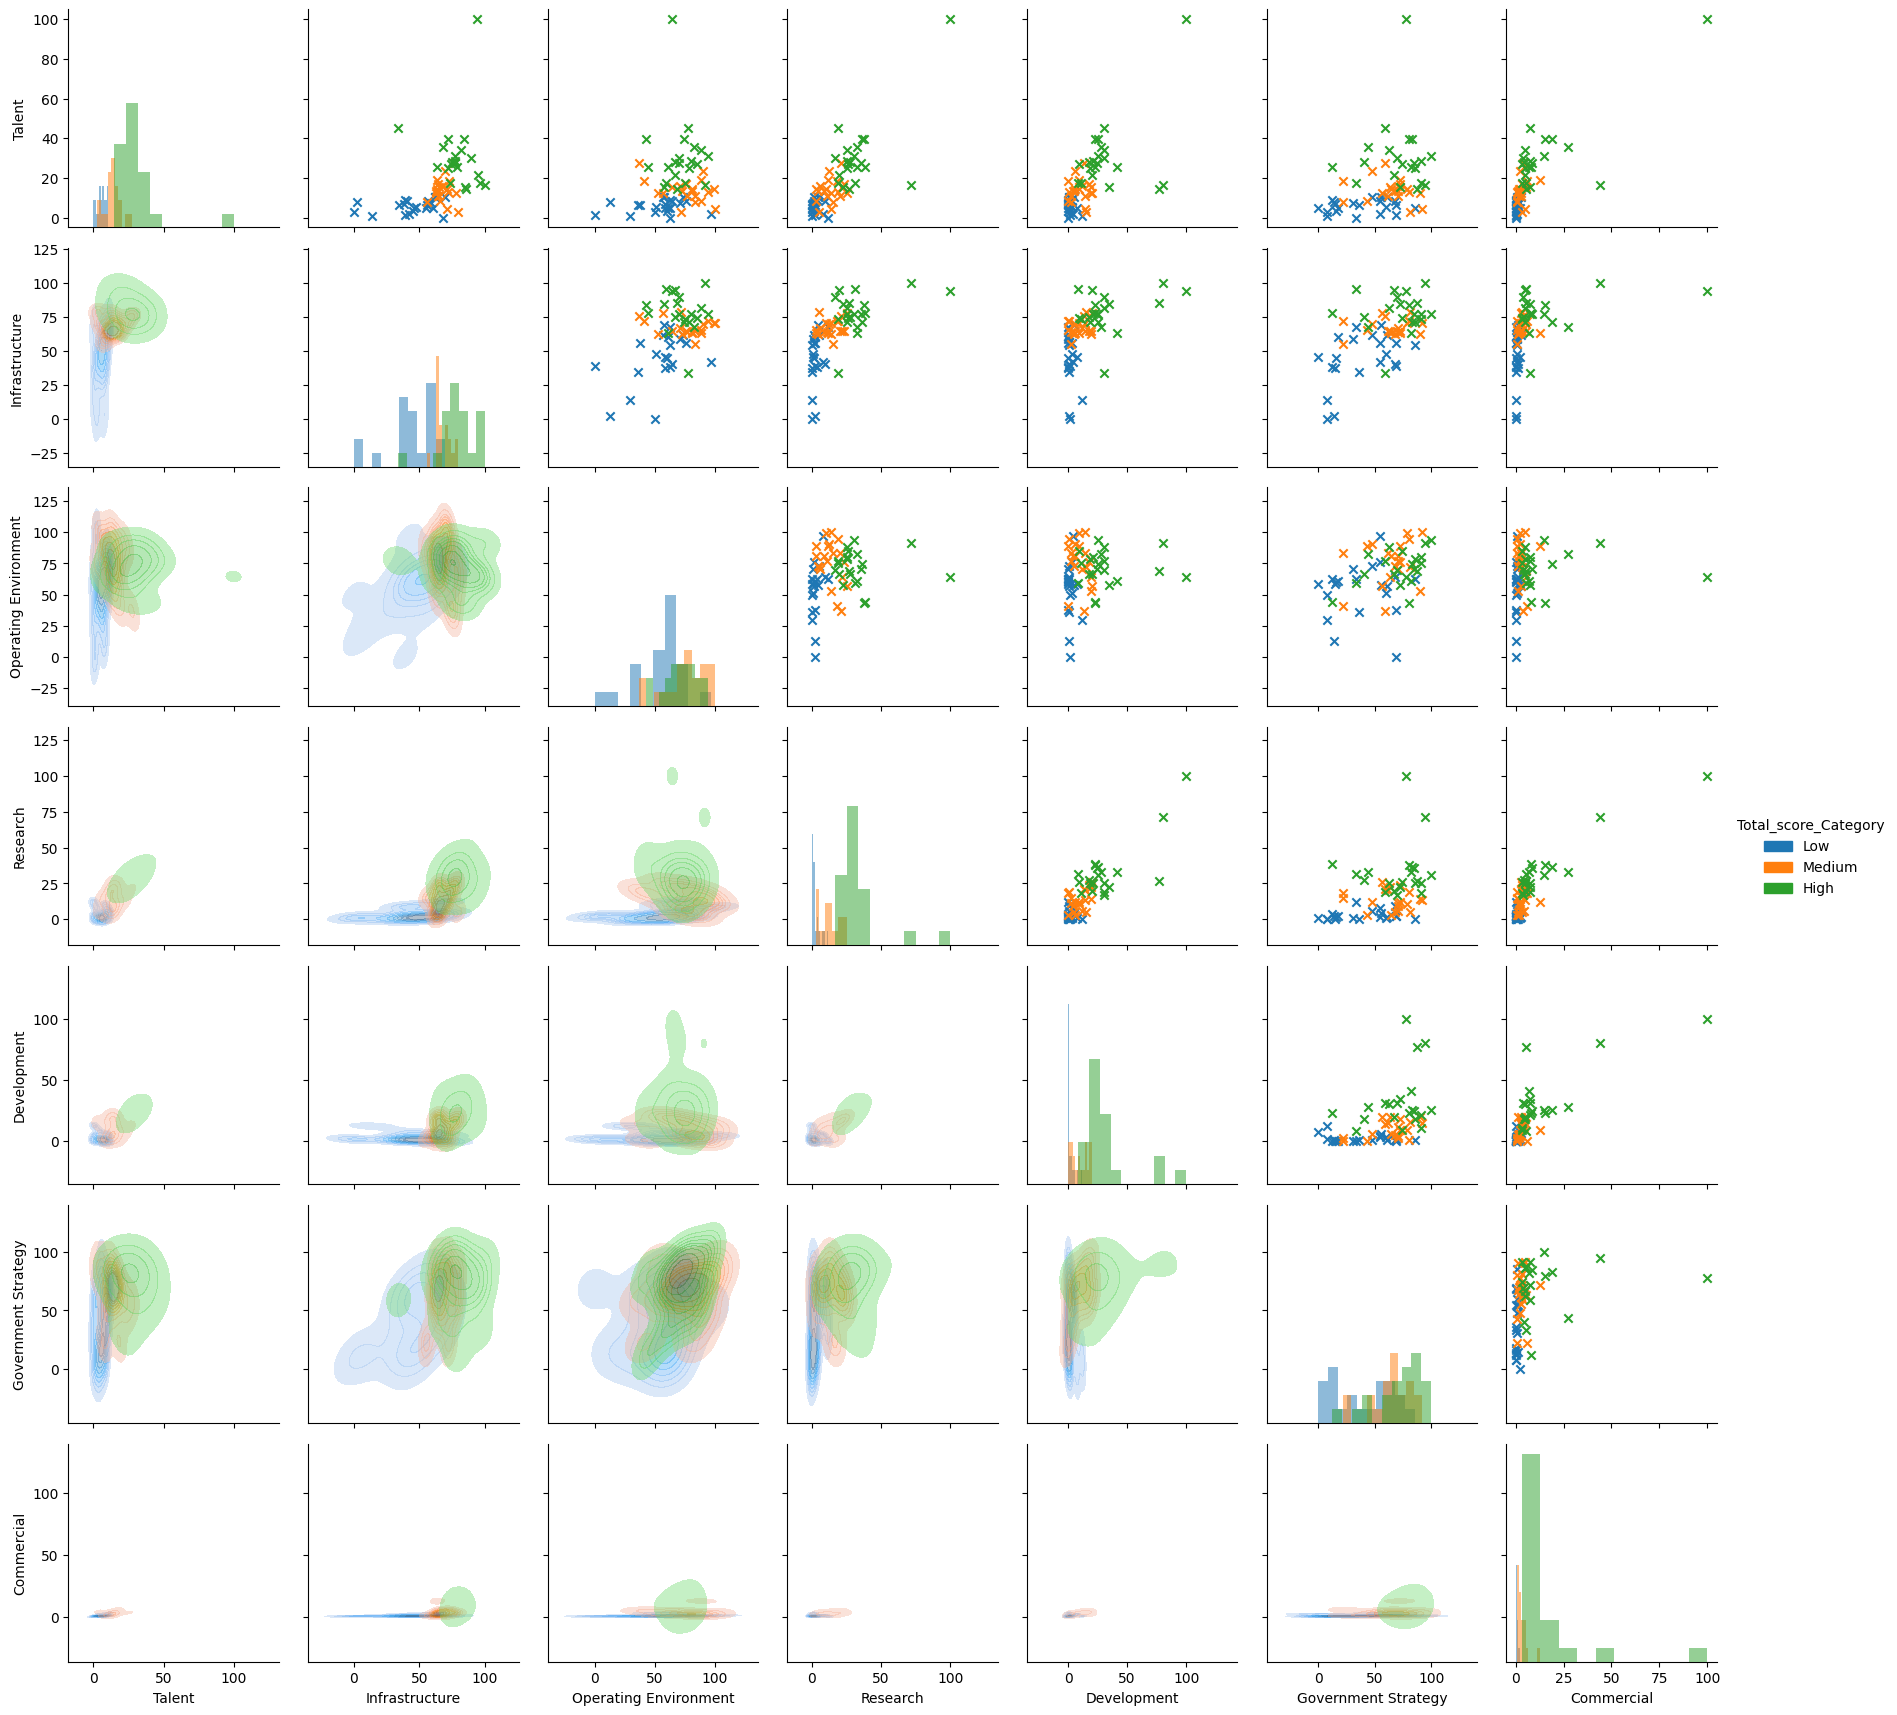

In [ ]:
g = sns.PairGrid(ai, hue="Total_score_Category")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=1, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.4)
g.add_legend()

In [ ]:
path = kagglehub.dataset_download("shreyasur965/recent-earthquakes")
earthquakes = pd.read_csv(os.path.join(path, "earthquakes.csv"))
# earthquakes = earthquakes.dropna()

# earthquakes = earthquakes.select_dtypes(include=['float64', 'int64'])
earthquakes = earthquakes.drop(columns=["time", "updated", "timezone", "latitude", "longitude", "tsunami", "nst", "dmin", "gap", "distanceKM", "postcode"])


In [ ]:
from collections import Counter
Counter(earthquakes["alert"])

Counter({'green': 711, nan: 373, 'yellow': 38, 'red': 9, 'orange': 6})

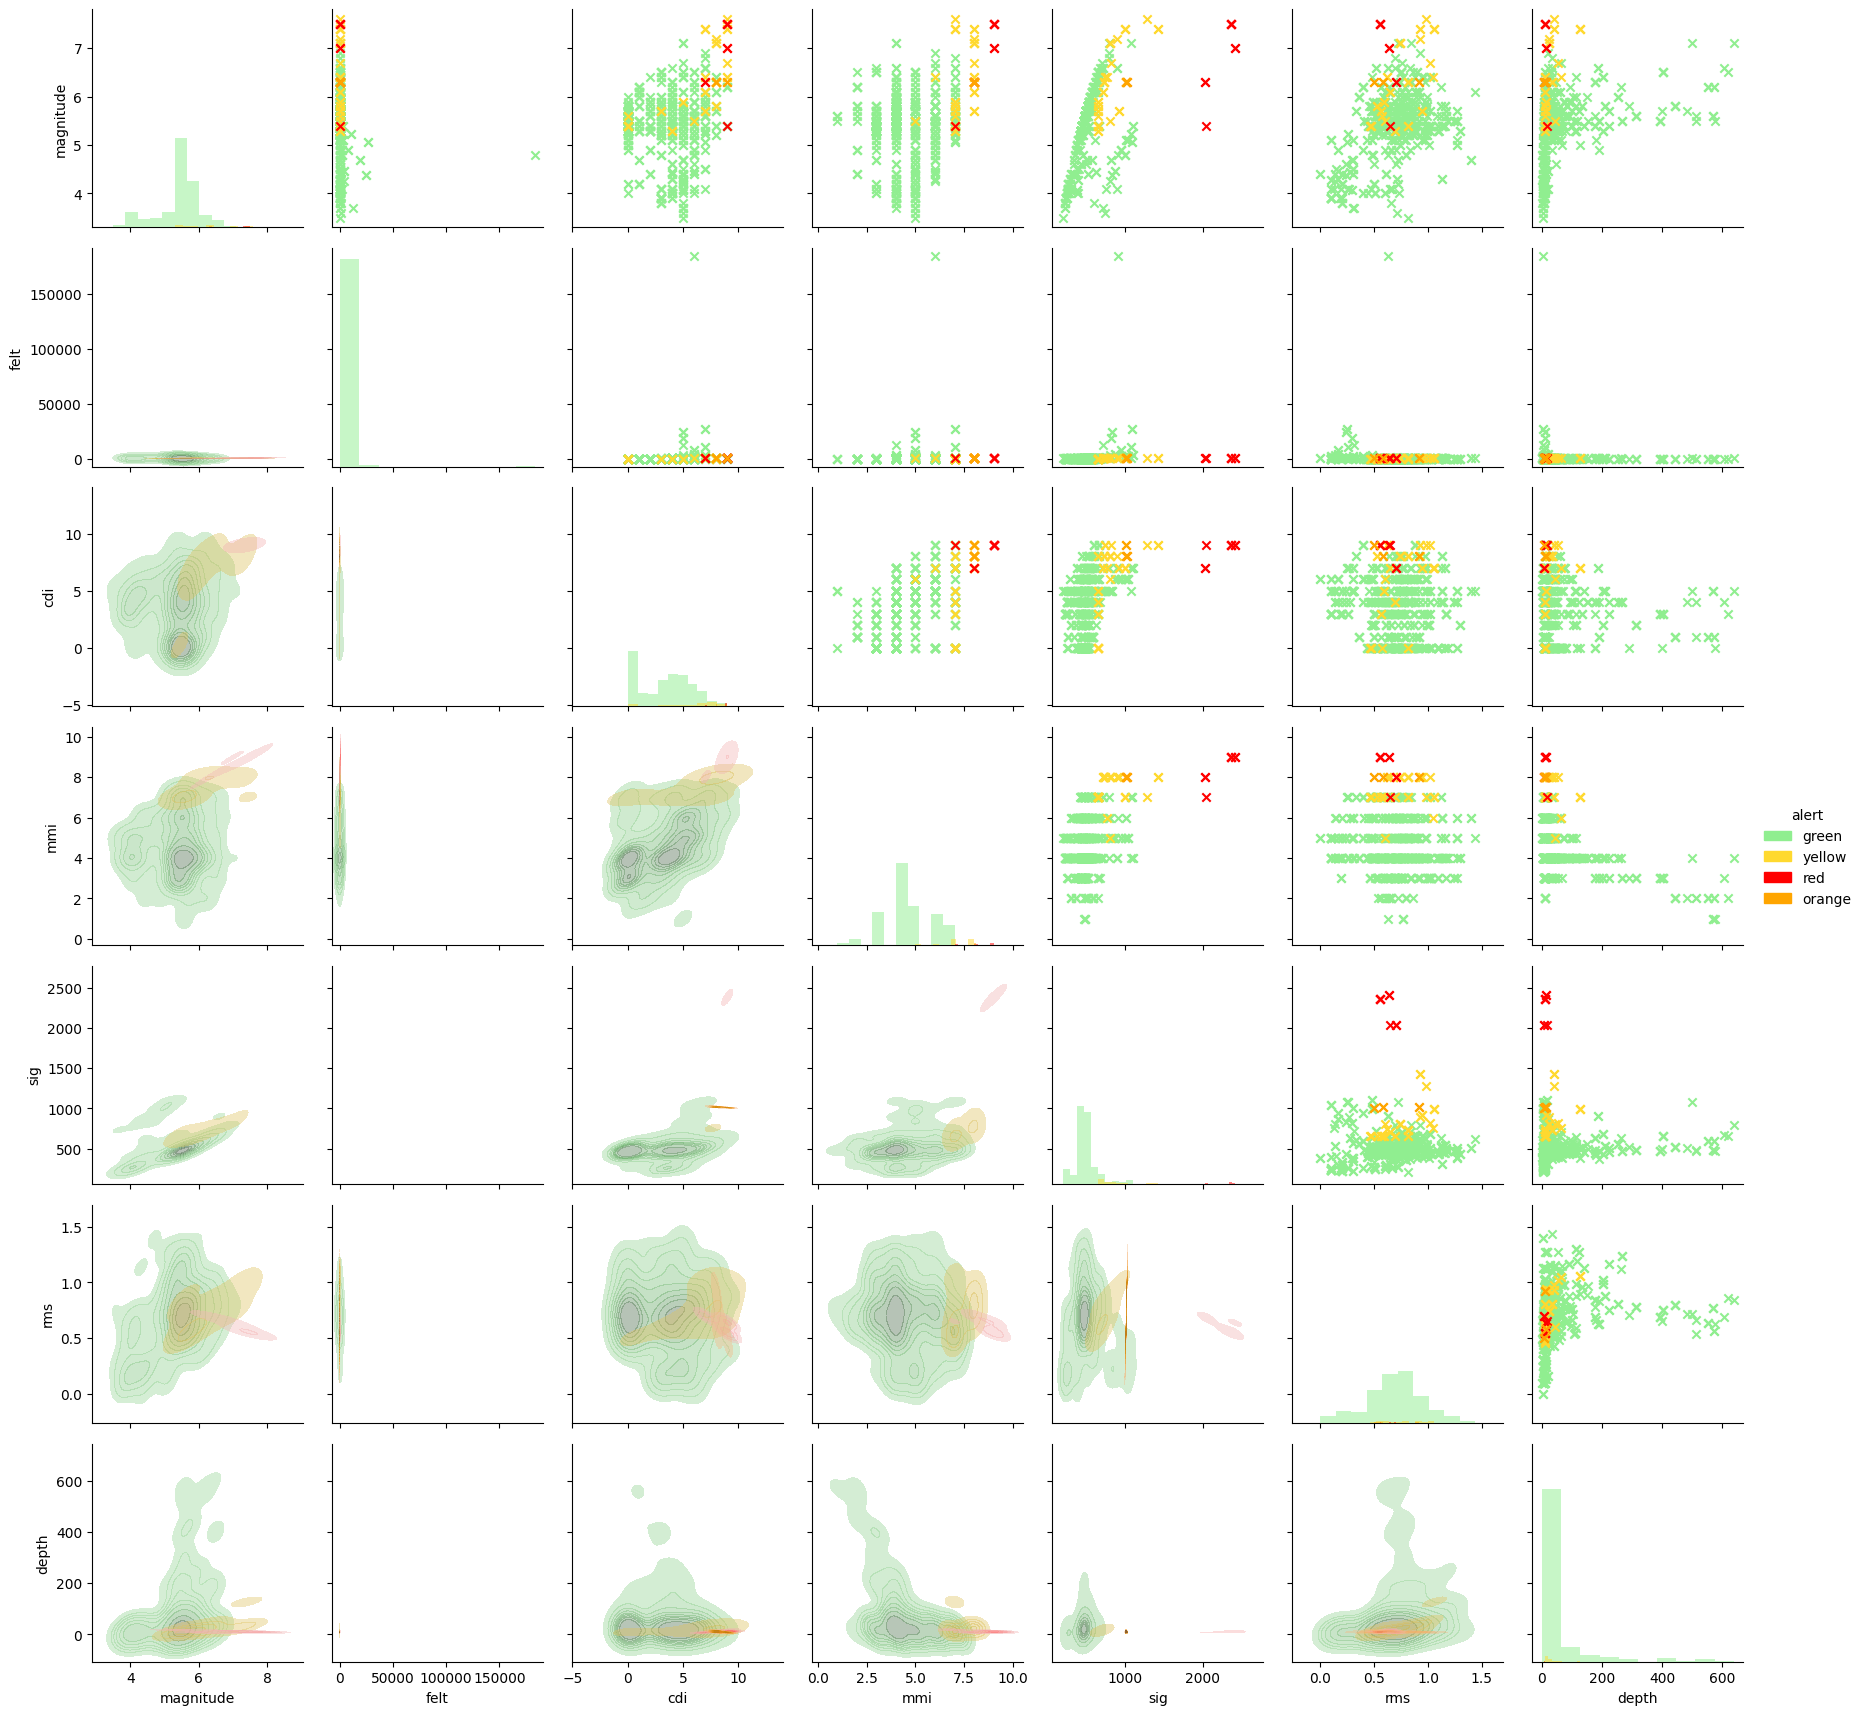

In [ ]:
g = sns.PairGrid(earthquakes, hue="alert", palette={"green": "lightgreen", "orange": "orange", "red": "red", "yellow": sns.color_palette("Set2")[-3]})
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=1, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.4)
g.add_legend()